In [134]:
#pip install opencv-python

# Detector de bordes opencv

In [135]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
import rasterio
import fiona

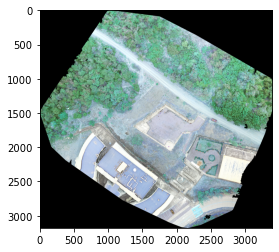

In [136]:
imgpath = "Mosaicos/bosqueed.tif"
imagen = cv2.imread(imgpath)
plt.imshow(imagen) 

cv2.canny para detectar bordes

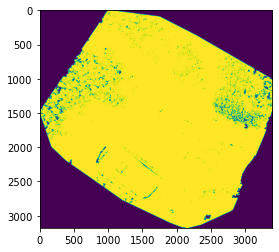

In [137]:
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
ret, bw_img = cv2.threshold(gris, 80, 90, cv2.THRESH_BINARY) 
plt.imshow(bw_img)

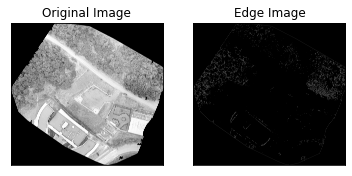

In [138]:
edges = cv2.Canny(bw_img,179,180)
plt.subplot(121),plt.imshow(gris,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

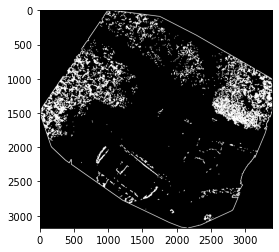

In [139]:
mask = np.zeros(imagen.shape,np.uint8)
(contornos,_) = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
im = cv2.drawContours(mask,contornos,-1,(255,255,255), 8)
plt.imshow(im)

# Determinar  zona de Bosque

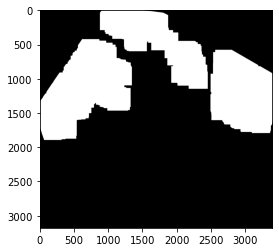

In [140]:
kernel = np.ones((3, 3), 'uint8')
#erosion = cv2.erode(im, kernel, iterations=3)
erosion = cv2.morphologyEx(im, cv2.MORPH_CLOSE, kernel, iterations=50)
erosion = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel, iterations=70)
erosion = cv2.dilate(erosion, kernel,iterations=50)
plt.imshow(erosion)

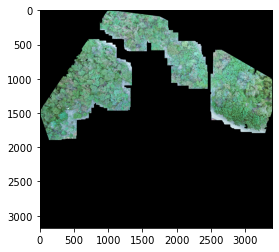

In [141]:
fg = cv2.bitwise_and(imagen, erosion)
plt.imshow(fg)

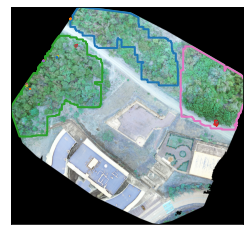

In [142]:
# Find contours at a constant value of 0.8
contours = measure.find_contours(fg[:,:,1], 0.8)
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(imagen, cmap=plt.cm.gray)
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [143]:
dataset = rasterio.open(imgpath)
poligono = []
for cnt in contours : 
    poligono1 = []
    for ind in cnt:
        #print(ind)
        x1,y1 = dataset.xy(ind[0], ind[1])
        poligono1.append([x1,y1,0.0])
    poligono.append([poligono1])

fn = 'Poligonos/bosque.shp'
opts = {
    'driver': 'ESRI Shapefile',
    'schema': {'geometry': '3D MultiPolygon', 'properties': {}},
    'crs' : dataset.crs
}
with fiona.open(fn, mode='w', **opts) as c:
    c.write({'geometry': {'type': 'MultiPolygon', 'coordinates': poligono}, 'properties': {}})

# Zona reforestable

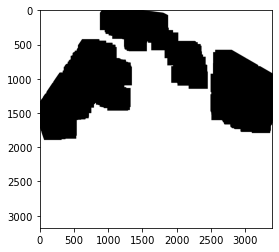

In [144]:
ret, erosion = cv2.threshold(erosion,127,255,cv2.THRESH_BINARY_INV)
#kernel = np.ones((3, 3), 'uint8')
#erosion = cv2.erode(erosion, kernel, iterations=70)
plt.imshow(erosion)

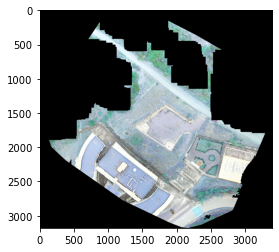

In [145]:
fg = cv2.bitwise_and(imagen, erosion)
plt.imshow(fg)

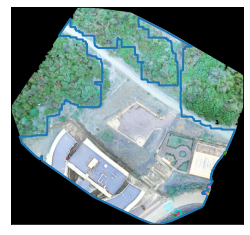

In [146]:
# Find contours at a constant value of 0.8
contours = measure.find_contours(fg[:,:,1], 0.8)
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(imagen, cmap=plt.cm.gray)
for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [147]:
dataset = rasterio.open(imgpath)
poligono = []
for cnt in contours : 
    poligono1 = []
    for ind in cnt:
        #print(ind)
        x1,y1 = dataset.xy(ind[0], ind[1])
        poligono1.append([x1,y1,0.0])
    poligono.append([poligono1])

fn = 'Poligonos/reforestable.shp'
opts = {
    'driver': 'ESRI Shapefile',
    'schema': {'geometry': '3D MultiPolygon', 'properties': {}},
    'crs' : dataset.crs
}
with fiona.open(fn, mode='w', **opts) as c:
    c.write({'geometry': {'type': 'MultiPolygon', 'coordinates': poligono}, 'properties': {}})